# MONTY HALL SIMULATIONS
## Classic Monty Hall
In this experiment we would like to show an example of the Bayes' therorem throught a famous example: the Monty Hall game. It consists in three doors, and behind one of them there is a prize. The player choose a door, and after this the presenter opens one of the other that have not the prize. Noe the player has the opportunity to change the door he chose before, and then the presenter show if he has won or not.

We want to study three different strategies: the player that never changes the door, the player who always does and a new player that comes only after the presenter opened the door without the prize and pick up one of the door that is still closed.

Instead of computing directly the probability using Bayes' theorem, we simulate the game multiple times and compute the probabilities for the three strategies.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def conservative(n_doors, winning):
    #First and only choice he make
    choice = np.random.randint(0, n_doors)
    if choice == winning:
        return 1
    else:
        return 0

def switcher(n_doors, n_opened, winning):
    first_choice = np.random.randint(0, n_doors)

    #Data structures creation
    doors = np.arange(n_doors)
    to_be_opened = np.arange(n_doors)
    remaining = np.arange(n_doors)
    
    #Delete from the list of doors the ones that can't be opened by the presenter
    if (first_choice == winning):
        to_be_opened = np.delete(doors, first_choice)
    else:
        to_be_opened = np.delete(doors, [first_choice, winning])
    
    #Choice of the doors to be opened
    to_be_opened = np.random.choice(to_be_opened, n_opened, replace=False)
    
    #List of the remaining doors the gamer can open and final choice
    remaining = np.delete(doors, np.append(to_be_opened, first_choice))
    final_choice = np.random.choice(remaining)
    if final_choice == winning:
        return 1
    else:
        return 0

def newcomer(n_doors, n_opened, winning):
    #Data structures creation
    doors = np.arange(n_doors)
    to_be_opened = np.arange(n_doors)
    remaining = np.arange(n_doors)
    
    #Delete from the list of doors the ones that can't be opened by the presenter
    to_be_opened = np.delete(doors, winning)
    
    #Choice of the doors to be opened
    to_be_opened = np.random.choice(to_be_opened, n_opened, replace=False)
    
    #List of the remaining doors the gamer can open and final choice
    remaining = np.delete(doors, to_be_opened)
    final_choice = np.random.choice(remaining)
    if final_choice == winning:
        return 1
    else:
        return 0

In [3]:
N_PLAYED = 100000
N = 3 #Total number of doors
M = 1 #Number of doors opened after the first choice

results = [0, 0, 0]

for i in range(0, N_PLAYED):
    winning = np.random.randint(0, N)
    results[0] += conservative(N, winning)/N_PLAYED
    results[1] += switcher(N, M, winning)/N_PLAYED
    results[2] += newcomer(N, M, winning)/N_PLAYED

print("Probability of winning of the consevative player: {:.2f}%".format(results[0]*100))
print("Probability of winning of the switching player: {:.2f}%".format(results[1]*100))
print("Probability of winning of the newcoming player: {:.2f}%".format(results[2]*100))

Probability of winning of the consevative player: 33.23%
Probability of winning of the switching player: 66.62%
Probability of winning of the newcoming player: 49.72%


As you can see, for the conservative and the newcomer, the probability is one over the number of doors available; for the switcher instead the probability is much higher, because he has (and exploit) the information given by the presenter who opened a door without the prize.

## Study of the game as a function of the total number of doors and of the number of doors opened by the presenter
Now we want to study the probabilities as a function of the numeber of total doors available (N) and the numbers of door opened by the presenter after the first choice of the switcher

First, we fix N, and we plot a graph of the probabilities as a function of M. Then we do this for different values of N.

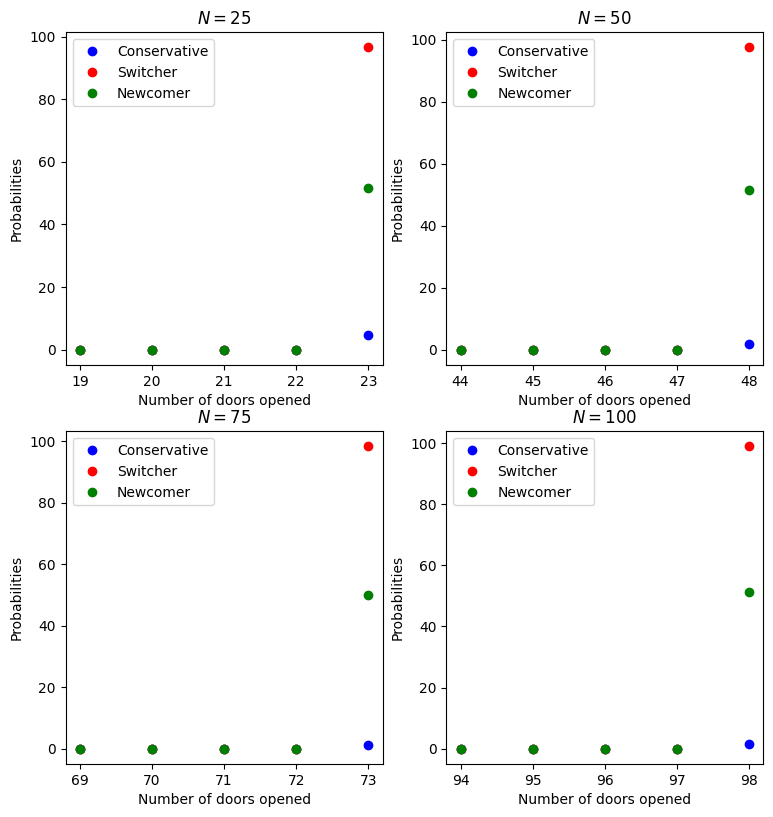

In [4]:
N_PLAYED = 1000
N = 25 #Total number of doors

plt.figure(figsize=(9,9.5))
for k in range(1, 5):
    N = 25*k
    M = np.arange((N-1)-5, N-1, 1)
    for i in range(0, 5):
        results_cons = np.zeros(5)
        results_switch = np.zeros(5)
        results_new = np.zeros(5)
        for j in range(0, N_PLAYED):
            winning = np.random.randint(0, N)
            results_cons[i] += conservative(N, winning)/N_PLAYED*100
            results_switch[i] += switcher(N, M[i], winning)/N_PLAYED*100
            results_new[i] += newcomer(N, M[i], winning)/N_PLAYED*100
    plt.subplot(2,2, k)
    plt.plot(M, results_cons, 'bo', markersize=6, label="Conservative")
    plt.title(r"$N={}$".format(N))
    plt.plot(M, results_switch, 'ro', markersize=6, label="Switcher")
    plt.plot(M, results_new, 'go', markersize=6, label="Newcomer")
    plt.legend()
    plt.ylabel("Probabilities")
    plt.xlabel("Number of doors opened")

As you can see, the three strategies are not very different until the presenter opens all the door he can before showing the exact solution.